## Reference:
* https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_datareader.data as web
import datetime
import math
from sklearn import preprocessing

In [2]:
sns.set()

In [3]:
#https://finance.yahoo.com/

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 1, 9)

df = web.DataReader(['SQIA3.SA',  'LINX3.SA', 'TOTS3.SA', 'IDNT3.SA'],'yahoo',start=start,end=end)     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-01-02 to 2019-01-10
Data columns (total 24 columns):
(High, SQIA3.SA)         253 non-null float64
(High, LINX3.SA)         253 non-null float64
(High, TOTS3.SA)         253 non-null float64
(High, IDNT3.SA)         253 non-null float64
(Low, SQIA3.SA)          253 non-null float64
(Low, LINX3.SA)          253 non-null float64
(Low, TOTS3.SA)          253 non-null float64
(Low, IDNT3.SA)          253 non-null float64
(Open, SQIA3.SA)         253 non-null float64
(Open, LINX3.SA)         253 non-null float64
(Open, TOTS3.SA)         253 non-null float64
(Open, IDNT3.SA)         253 non-null float64
(Close, SQIA3.SA)        253 non-null float64
(Close, LINX3.SA)        253 non-null float64
(Close, TOTS3.SA)        253 non-null float64
(Close, IDNT3.SA)        253 non-null float64
(Volume, SQIA3.SA)       253 non-null float64
(Volume, LINX3.SA)       253 non-null float64
(Volume, TOTS3.SA)       253 non-null float64
(V

In [5]:
list(df)
adjClose = df['Adj Close']
adjClose.head()

Symbols,SQIA3.SA,LINX3.SA,TOTS3.SA,IDNT3.SA
Date,,,,
2018-01-02,26.289188,21.097639,29.665810,10.40
2018-01-03,26.487598,20.969656,30.295546,10.74
2018-01-04,26.408236,21.363453,30.108635,10.60
2018-01-05,26.537199,21.599731,30.757994,10.72
2018-01-08,26.785213,21.540661,30.738371,10.45


In [6]:
# This is the percentage change from the immediately previous row by default 
retscomp = adjClose.pct_change()

corr = retscomp.corr()
retscomp.head()

Symbols,SQIA3.SA,LINX3.SA,TOTS3.SA,IDNT3.SA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.007547,-0.006066,0.021228,0.032692
2018-01-04,-0.002996,0.018779,-0.006170,-0.013035
2018-01-05,0.004883,0.011060,0.021567,0.011321
2018-01-08,0.009346,-0.002735,-0.000638,-0.025187


In [7]:
#Remove NaN values
retscomp.dropna(inplace=True)
retscomp.head()

Symbols,SQIA3.SA,LINX3.SA,TOTS3.SA,IDNT3.SA
Date,,,,
2018-01-03,0.007547,-0.006066,0.021228,0.032692
2018-01-04,-0.002996,0.018779,-0.006170,-0.013035
2018-01-05,0.004883,0.011060,0.021567,0.011321
2018-01-08,0.009346,-0.002735,-0.000638,-0.025187
2018-01-09,0.009259,0.005484,0.000318,0.004785


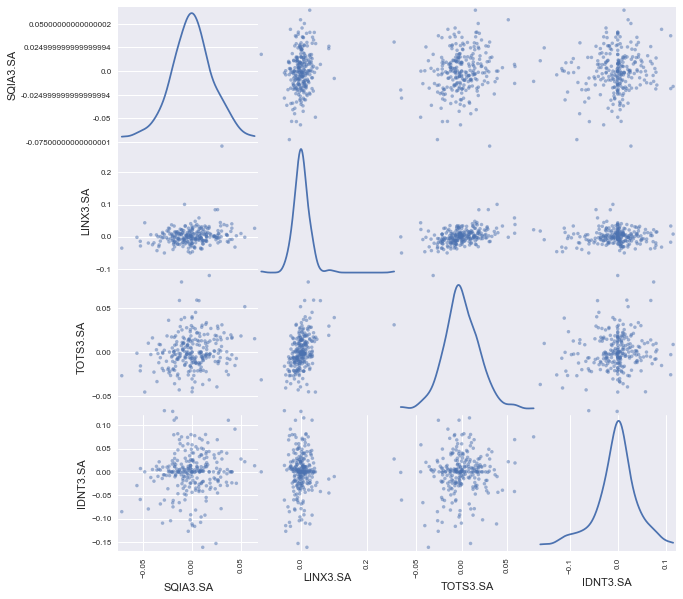

In [8]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

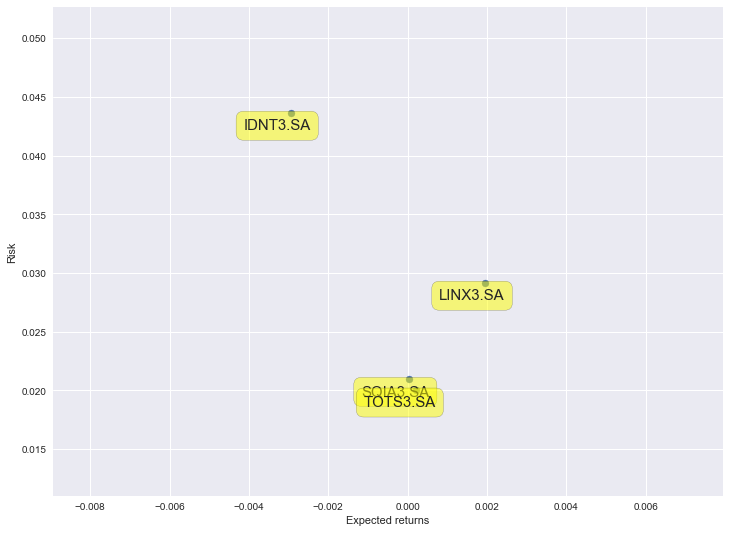

In [9]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        size=15
        )